In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
from pandas.plotting import andrews_curves
import plotly.express as px
import numpy as np
import scipy as sp
import sklearn as sk
from sklearn.preprocessing import StandardScaler
import plotly.express as px

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileDownloaded = drive.CreateFile({'id':'1zqWG_FzDybdekna75E77vIzdFxwAq_71'})

In [ ]:
fileDownloaded.GetContentFile('/Housing Data2.csv')

In [ ]:
df = pd.read_csv('/Housing Data2.csv', delimiter=';' )

df.head()

SizeRank         RegionName StateName     Date  ...  TEMP_F RAIN_IN TEMP_C RAIN_MM
0        11  San Francisco, CA        CA  2009-12  ...    49,5    3,07   9,72     7,8
1        11  San Francisco, CA        CA  2009-11  ...    56,9     0,2  13,83    0,51
2        11  San Francisco, CA        CA  2009-10  ...    62,1    2,96  16,72    7,52
3        11  San Francisco, CA        CA  2009-09  ...    66,5    0,27  19,17    0,69
4        11  San Francisco, CA        CA  2009-08  ...    65,9       0  18,83       0

[5 rows x 9 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SizeRank    1044 non-null   int64  
 1   RegionName  1044 non-null   object 
 2   StateName   1044 non-null   object 
 3   Date        1044 non-null   object 
 4   Price       1044 non-null   int64  
 5   TEMP_F      1044 non-null   float64
 6   RAIN_IN     1044 non-null   float64
 7   TEMP_C      1044 non-null   float64
 8   RAIN_MM     1044 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 73.5+ KB


In [ ]:
df['RAIN_IN'] = df['RAIN_IN'].str.replace(',','').astype(np.float64)

In [ ]:
df['RAIN_MM'] = df['RAIN_MM'].str.replace(',','').astype(np.float64)

In [ ]:
df['TEMP_F'] = df['TEMP_F'].str.replace(',','').astype(np.float64)

In [ ]:
df['TEMP_C'] = df['TEMP_C'].str.replace(',','').astype(np.float64)

In [ ]:
#Revisando valores nulos
df.isnull().sum()

SizeRank      0
RegionName    0
StateName     0
Date          0
Price         0
TEMP_F        0
RAIN_IN       0
TEMP_C        0
RAIN_MM       0
dtype: int64

In [ ]:
df.describe()

SizeRank         Price  ...       TEMP_C      RAIN_MM
count  1044.000000  1.044000e+03  ...  1044.000000  1044.000000
mean      8.750000  4.366680e+05  ...  1400.591954   828.113985
std       5.119825  2.329154e+05  ...  1052.708680   880.881723
min       1.000000  1.269170e+05  ... -7278.000000     0.000000
25%       6.250000  2.730095e+05  ...   739.000000    96.750000
50%       9.500000  3.889185e+05  ...  1511.000000   594.500000
75%      12.000000  5.112555e+05  ...  2168.250000  1224.750000
max      15.000000  1.341085e+06  ...  2994.000000  4986.000000

[8 rows x 6 columns]

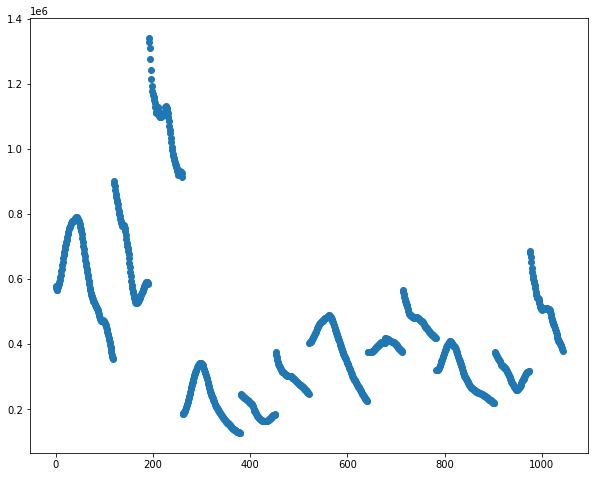

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(np.arange(len(df)), df['Price'], 'o')

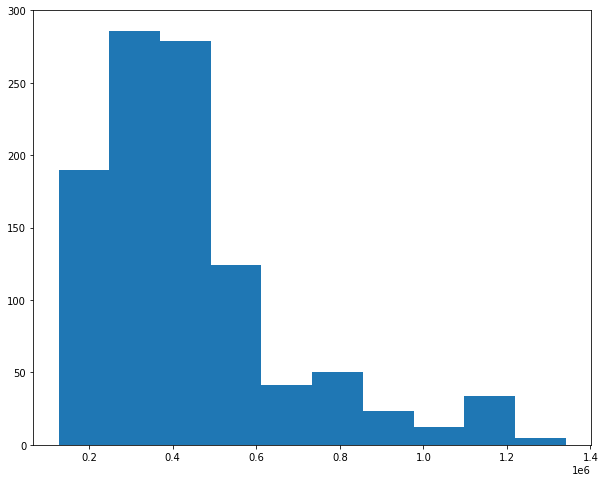

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.hist(df['Price'])
plt.show()

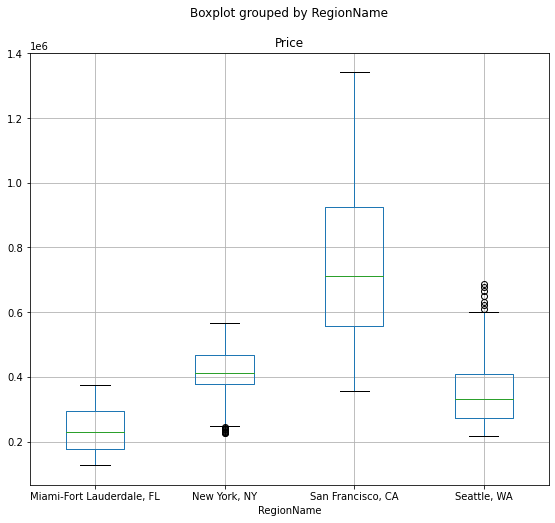

In [ ]:
#Price by City
fig, ax = plt.subplots(figsize=(9,8))
plt.suptitle('')
df.boxplot(column=['Price'], by='RegionName', ax=ax)

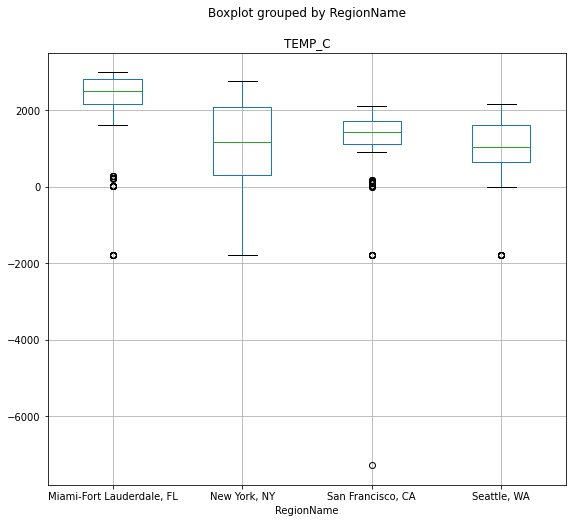

In [ ]:
 #Temperature by City
fig, ax = plt.subplots(figsize=(9,8))
plt.suptitle('')
df.boxplot(column=['TEMP_C'], by='RegionName', ax=ax)

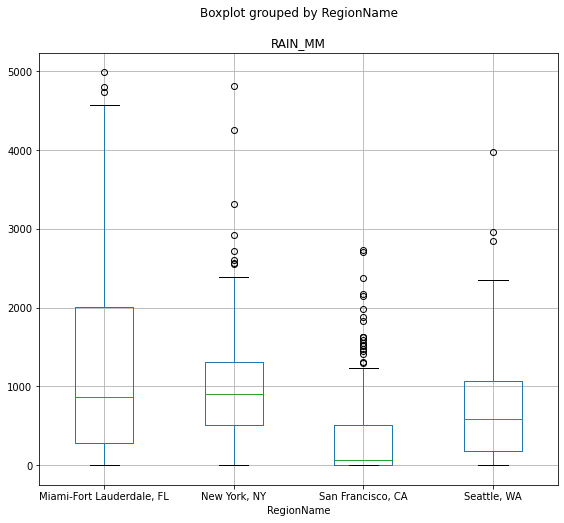

In [ ]:
 #Rain by City
fig, ax = plt.subplots(figsize=(9,8))
plt.suptitle('')
df.boxplot(column=['RAIN_MM'], by='RegionName', ax=ax)

# Análisis de correlaciones
Para el análisis de dependencias de nuestras variables es indispensable el uso de datos numéricos. Por esta razón haremos una asignación numerica de 0 a n a las variables tipo "objeto"

In [ ]:
df['RegionName'] = df['RegionName'].replace(['San Francisco, CA','Miami-Fort Lauderdale, FL','New York, NY','Seattle, WA'],['0','1','2','3'])

In [ ]:
df['StateName'] = df['StateName'].replace(['WA','NY','FL','CA'],['0','1','2','3'])

Comprobamos que no hayan valores "NA" y revisamos que las variables existentes estén en modo "int64"


In [ ]:
#Comprobar valores nulos del dataframe
nan_values = df.isnull().values.any()
print("¿Hay valores nulos?", (nan_values))

¿Hay valores nulos? False


In [ ]:
df['RegionName'] = pd.to_numeric(df['RegionName'])
df['StateName'] = pd.to_numeric(df['StateName'])

df.dtypes

SizeRank        int64
RegionName      int64
StateName       int64
Date           object
Price           int64
TEMP_F        float64
RAIN_IN       float64
TEMP_C        float64
RAIN_MM       float64
dtype: object

# Estandarizamos los datos:

La normalización de un conjunto de datos es un requisito común para muchos estimadores de aprendizaje automático:pueden comportarse mal si las características individuales no se parecen más o menos a los datos estándar distribuidos normalmente (por ejemplo,Gaussiano con media 0 y varianza unitaria).

In [ ]:
data = np.array(df)
print (type(df),df.shape)

<class 'pandas.core.frame.DataFrame'> (1044, 9)


Para el análisis de dependencias será necesario usar solo las variables independientes, por lo tanto eliminamos nuestra variable respuesta:

In [ ]:
data_x = np.array(df[['TEMP_F', 'RAIN_IN', 'TEMP_C','RAIN_MM','RegionName']])
data_x = data_x[0:10000,:]
data_x

array([[ 495.,  307.,  972.,   78.,    0.],
       [ 569.,    2., 1383.,   51.,    0.],
       [ 621.,  296., 1672.,  752.,    0.],
       ...,
       [ 494.,  552.,  967., 1402.,    3.],
       [ 474.,  597.,  856., 1516.,    3.],
       [ 437.,  746.,   65., 1895.,    3.]])

In [ ]:
sc = StandardScaler()

data_x = sc.fit_transform(data_x)

# Correlación entre pares de variables.

Cargamos la libreria "Funciones Estadísticas":

In [ ]:
fileDownloaded2 = drive.CreateFile({'id':'1wF87kZemhK5JGvmkRwYCcsNWkmW2mSLp'})

In [ ]:
fileDownloaded2.GetContentFile('funciones_Estadisticas.py')

In [ ]:
import funciones_Estadisticas

In [ ]:
from funciones_Estadisticas import correlaciones

print(correlaciones(data_x).round(2))

[[ 1.    0.15  0.63  0.16 -0.16]
 [ 0.15  1.    0.21  0.89  0.1 ]
 [ 0.63  0.21  1.    0.21 -0.18]
 [ 0.16  0.89  0.21  1.    0.11]
 [-0.16  0.1  -0.18  0.11  1.  ]]


In [ ]:
s_menos_uno = np.linalg.inv(funciones_Estadisticas.Matriz_covarianzas(data_x))

Las correlaciones que encontramos entre variables son TEMP_C Y TEMP_F con un 63% de relación entre ellas, RAIN_MM Y RAIN_IN con un 89% 

Coeficiente de determinación o coeficiente de correlación múltiple: Los términos diagonales de la inversa de la matriz de covarianzas son precisamente las inversas de las varianzas residuales de la regresión de cada variable con el resto. La matriz S−1 es:

In [ ]:
s_menos_uno = np.linalg.inv(funciones_Estadisticas.Matriz_covarianzas(data_x))

In [ ]:
DD = np.diag(s_menos_uno)*np.diag(funciones_Estadisticas.Matriz_covarianzas(data_x))
print(DD.round(4))
print('')
DD_inverso = DD**-1
print(DD_inverso.round(4))
print('')
print('')
print('Estos son los coeficientes de correlacion multiple entre cada variable y el resto:')
print('')
print('')
UNO_menos_DD_inverso = 1 - DD_inverso
print(UNO_menos_DD_inverso.round(2))
print('')
print('')
print('En este caso hay  variables  predecibles frente al resto:')
print('RAIN_IN(79%), RAIN_MM (79%), TEMP_C (42%),')

[1.677  4.708  1.7313 4.7279 1.0625]

[0.5963 0.2124 0.5776 0.2115 0.9412]


Estos son los coeficientes de correlacion multiple entre cada variable y el resto:


[0.4  0.79 0.42 0.79 0.06]


En este caso hay  variables  predecibles frente al resto:
RAIN_IN(79%), RAIN_MM (79%), TEMP_C (42%),


Encontremos las θ de la regresión múltiple de la variable que mejor se puede explicar a partir de las demás. Para esto podemos haremos un analisis una apertura de las variables previamente asignadas de 0 a n en columnas binarias que nos ayudarán a determinar si alguna de estas variables tiene una incidencia alta en la predicción de la variable loan status.

Cargamos statsmodel y hacemos el modelo de regresión para ubicar los θ

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
X = data_x 
y = np.array(df[['StateName']])
y = y[0:10000,:]


In [ ]:
## fit a OLS model with intercept 
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.001e+31
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        02:31:22   Log-Likelihood:                 33718.
No. Observations:                1044   AIC:                        -6.742e+04
Df Residuals:                    1038   BIC:                        -6.739e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5000   7.07e-17   2.12e+16      0.000       1.500       1.500
x1          1.318e-16   9.16e-17      1.440      0.150   -4.78e-17    3.11e-16
x2          7.563e-16   1.53e-16      4.930      0.000    4.55e-16    1.06e-15
x3         -1.388e-17    9.3e-17     -0.149      0.881   -1.96e-16    1.69e-16
x4         -9.368e-16   1.54e-16     -6.093      0.000   -1.24e-15   -6.35e-16
x5            -1.1180   7.29e-17  -1.53e+16      0.000      -1.118      -1.118
==============================================================================
Omnibus:                      148.864   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1864.462
Skew:                           0.017   Prob(JB):                         0.00
Kurtosis:                       9.547   Cond. No.                         4.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conjunto completo de todas las variables.

In [ ]:
Det = np.linalg.det(funciones_Estadisticas.correlaciones(data_x))
f = (len(funciones_Estadisticas.correlaciones(data_x))-1)
D = 1 - Det**(1/f)
D

0.41829709338003196

#  Entrenamiento en clasificación de datos

Asignamos las variables independientes X

Considerando el análisis de correlación, determinamos que las siguientes variables respetando un P>[t] de 0.05 podemos concluir que las siguientes variables no van a generar valor en la predicción:


*  RegionName
*  TEMP_F
*  TEMP_C


Las variables que se considerarán en este modelo de predicción serán:
*  RAIN_IN
*  RAIN_MM

In [ ]:
data_x = np.array(df[['RAIN_IN', 'RAIN_MM']])
data_x = data_x[0:10000,:]
data_x

array([[ 307.,   78.],
       [   2.,   51.],
       [ 296.,  752.],
       ...,
       [ 552., 1402.],
       [ 597., 1516.],
       [ 746., 1895.]])

separamos los datos en entranmiento y testeo (80/20)

In [ ]:
y = np.array(df[['StateName']])
y = y[0:10000,:]

Regresión Lineal

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (835, 6) (835, 1)
Test set: (209, 6) (209, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[73  2]
 [ 5 34]]


In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[73  2]
 [ 5 34]]


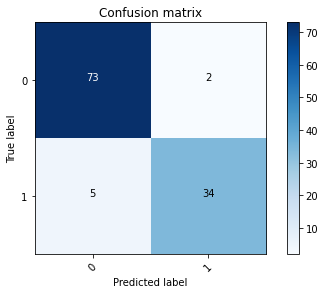

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['0','1'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.94      0.97      0.95        75

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.15856008731166954

In [ ]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.28


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



# KNN

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

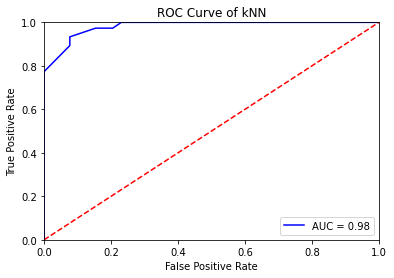

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [ ]:
pred_train = knn.predict(X_train)
print("Matriz de confusión","\n",confusion_matrix(y_train, pred_train))
print("Reporte Clasificación","\n",classification_report(y_train, pred_train))

Matriz de confusión 
 [[156  17]
 [ 10 272]]
Reporte Clasificación 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       173
           1       0.94      0.96      0.95       282

    accuracy                           0.94       455
   macro avg       0.94      0.93      0.94       455
weighted avg       0.94      0.94      0.94       455



In [ ]:
pred_test = knn.predict(X_test)
print("Matriz de confusión","\n",confusion_matrix(y_test, pred_test))
print("Reporte Clasificación","\n",classification_report(y_test, pred_test))

Matriz de confusión 
 [[35  4]
 [ 4 71]]
Reporte Clasificación 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        39
           1       0.95      0.95      0.95        75

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [ ]:
from sklearn.metrics import mean_squared_error
#Error de entrenamiento
mse_train = mean_squared_error(y_train, pred_train)
#Error de testeo
mse_test = mean_squared_error(y_test, pred_test)
print("Error de entrenamiento:","\n",mse_train.round(3))
print("Error de testeo:","\n",mse_test.round(3))

Error de entrenamiento: 
 0.059
Error de testeo: 
 0.07
